In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("lung_cancer_mortality_data_large_v2.csv")

In [ ]:
df.head(5)

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257.0,1.0,1.0,0.0,0.0,Combined,2017-11-15,0.0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208.0,1.0,0.0,0.0,0.0,Radiation,2024-04-25,0.0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193.0,0.0,0.0,0.0,0.0,Surgery,2025-03-11,0.0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249.0,1.0,1.0,1.0,0.0,Surgery,2017-04-14,1.0
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262.0,0.0,0.0,0.0,0.0,Chemotherapy,2024-09-20,0.0


In [7]:
df.shape

(9200, 18)

In [ ]:
df.isnull().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   1
beginning_of_treatment_date    1
family_history                 1
smoking_status                 1
bmi                            1
cholesterol_level              1
hypertension                   1
asthma                         1
cirrhosis                      1
other_cancer                   1
treatment_type                 1
end_treatment_date             1
survived                       1
dtype: int64

In [9]:
df.shape

(9200, 18)

In [ ]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

In [ ]:
print("number of people servived")
print(df['survived'].value_counts())

number of people servived
survived
0.0    35617
1.0    10046
Name: count, dtype: int64


<Axes: xlabel='survived', ylabel='count'>

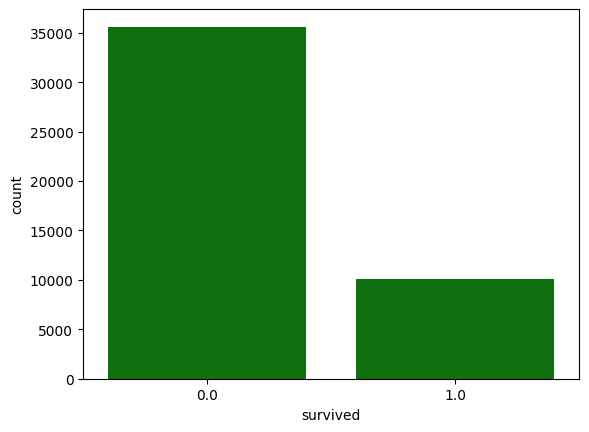

In [ ]:
sns.countplot(x="survived",data=df,color="green")

gender
Female    22944
Male      22719
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

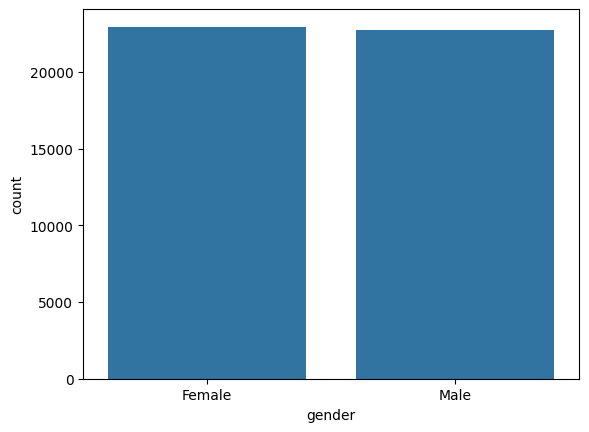

In [ ]:
print(df['gender'].value_counts())
sns.countplot(x="gender",data=df)

In [ ]:
df["cancer_stage"].unique()

array(['Stage III', 'Stage IV', 'Stage I', 'Stage II'], dtype=object)

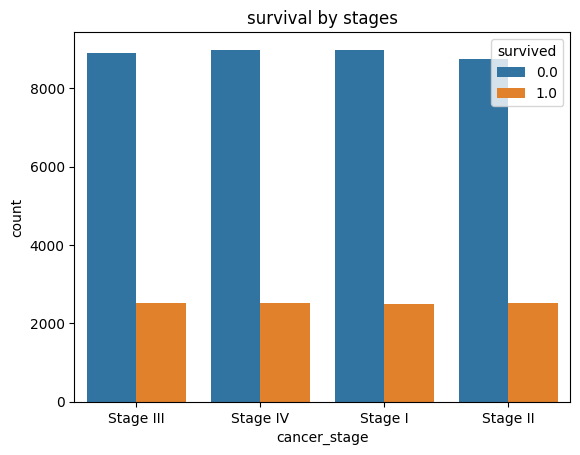

In [ ]:
# Group by cancer_stage and count the number of survivors and non-survivors

sns.countplot(data=df,x="cancer_stage",hue="survived")
plt.title("survival by stages")
plt.xlabel("cancer_stage")
plt.ylabel("count")
plt.show()


In [ ]:
df["smoking_status"].unique()

array(['Never Smoked', 'Passive Smoker', 'Former Smoker',
       'Current Smoker'], dtype=object)

In [ ]:
survival_by_smoking=df.groupby(["smoking_status","survived"]).size().unstack(fill_value=0)
print(survival_by_smoking)

survived         0.0   1.0
smoking_status            
Current Smoker  8881  2562
Former Smoker   8935  2485
Never Smoked    8887  2510
Passive Smoker  8914  2489


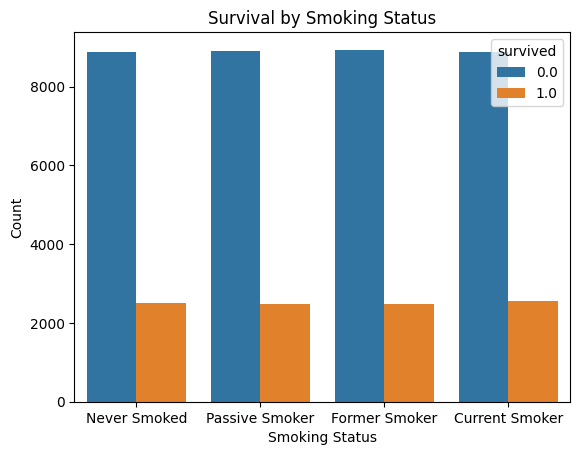

In [ ]:
sns.countplot(data=df, x='smoking_status', hue='survived')
plt.title('Survival by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

In [ ]:
gender_counts=df["gender"].value_counts()
print(gender_counts)

gender
Female    22944
Male      22719
Name: count, dtype: int64


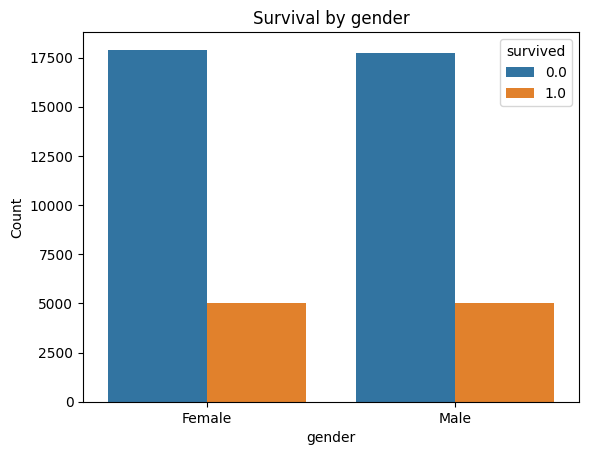

In [ ]:
sns.countplot(data=df, x='gender', hue='survived')
plt.title('Survival by gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Group by cancer_stage and count the number of survivors and non-survivors
survival_counts = df.groupby(['gender', 'survived']).size().unstack(fill_value=0)
print(survival_counts)


survived    0.0   1.0
gender               
Female    17899  5045
Male      17718  5001


<Axes: xlabel='asthma', ylabel='count'>

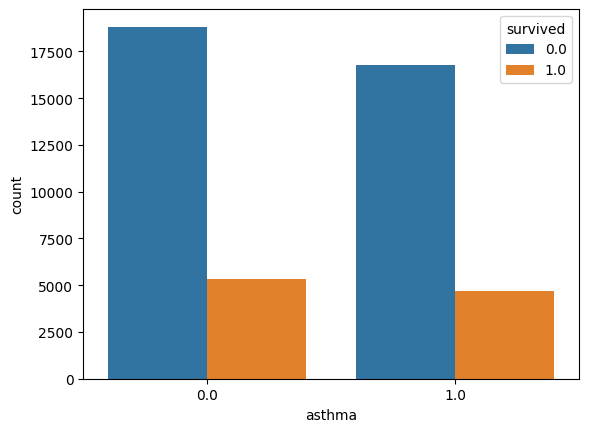

In [ ]:
sns.countplot(data=df, x='asthma', hue='survived')

In [10]:
df["age"].max()

93.0

In [11]:
df["age"].min()

18.0

In [12]:
age_bins = [18, 30, 45, 60, 75, 95]
age_labels = ['18-30', '31-45', '46-60', '61-75', '76-95']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [13]:
df['age_category'].value_counts()

age_category
46-60    4797
61-75    2748
31-45    1396
76-95     213
18-30      46
Name: count, dtype: int64

<Axes: xlabel='age_category'>

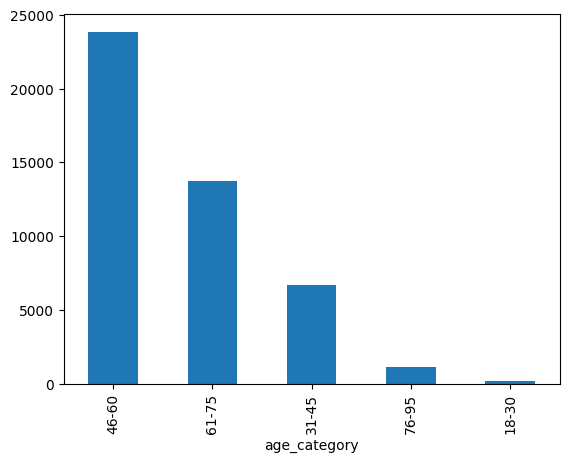

In [ ]:

df['age_category'].value_counts().plot(kind='bar')


<Axes: xlabel='age_category', ylabel='count'>

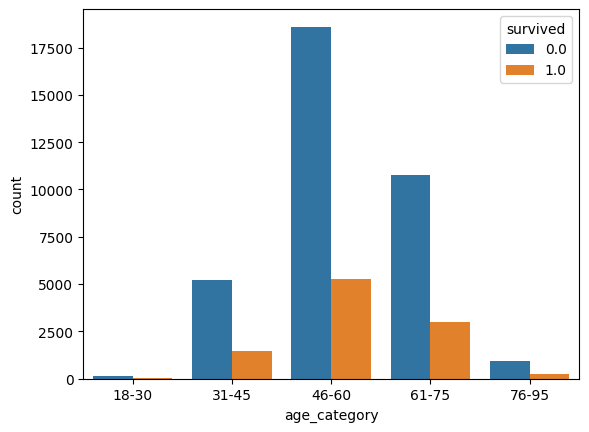

In [ ]:
sns.countplot(data=df, x='age_category', hue='survived')

<Axes: xlabel='family_history', ylabel='count'>

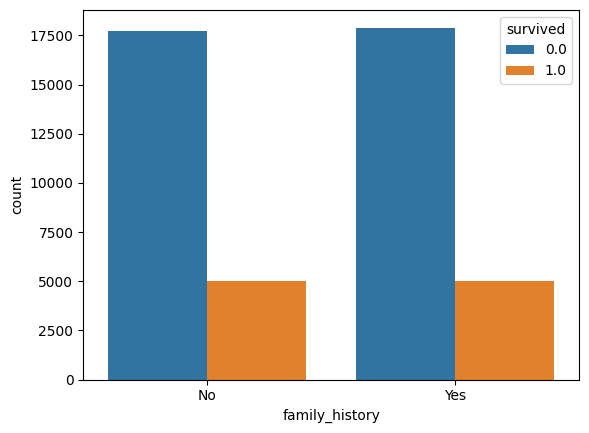

In [ ]:
sns.countplot(data=df, x='family_history', hue='survived')

In [ ]:
df["country"].unique()

array(['Germany', 'Czech Republic', 'Romania', 'Latvia', 'Greece',
       'Finland', 'Denmark', 'France', 'Slovakia', 'Hungary', 'Estonia',
       'Portugal', 'Croatia', 'Netherlands', 'Austria', 'Poland',
       'Lithuania', 'Italy', 'Belgium', 'Slovenia', 'Ireland', 'Spain',
       'Sweden', 'Bulgaria', 'Malta', 'Luxembourg', 'Cyprus'],
      dtype=object)

In [ ]:
df["treatment_type"].unique()

array(['Combined', 'Radiation', 'Surgery', 'Chemotherapy'], dtype=object)

<Axes: xlabel='treatment_type', ylabel='count'>

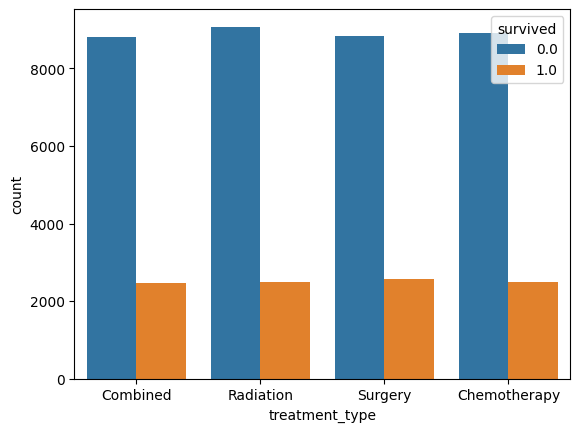

In [ ]:
sns.countplot(data=df, x='treatment_type', hue='survived')

<Axes: xlabel='cholesterol_level'>

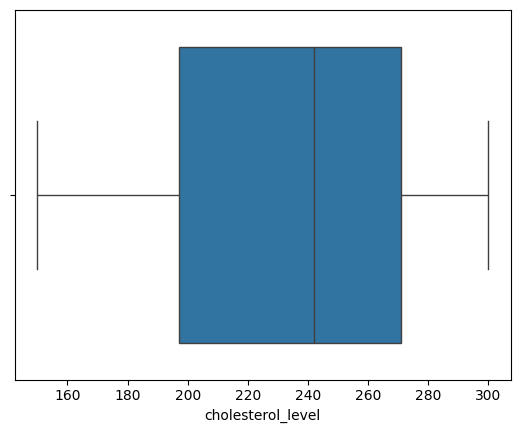

In [ ]:

# Box Plot
sns.boxplot(x=df['cholesterol_level'])


In [ ]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,age_category
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257.0,1.0,1.0,0.0,0.0,Combined,2017-11-15,0.0,61-75
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208.0,1.0,0.0,0.0,0.0,Radiation,2024-04-25,0.0,46-60
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193.0,0.0,0.0,0.0,0.0,Surgery,2025-03-11,0.0,61-75
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249.0,1.0,1.0,1.0,0.0,Surgery,2017-04-14,1.0,46-60
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262.0,0.0,0.0,0.0,0.0,Chemotherapy,2024-09-20,0.0,31-45


In [ ]:
df["other_cancer"].value_counts()


other_cancer
0.0    41561
1.0     4102
Name: count, dtype: int64

<Axes: xlabel='age'>

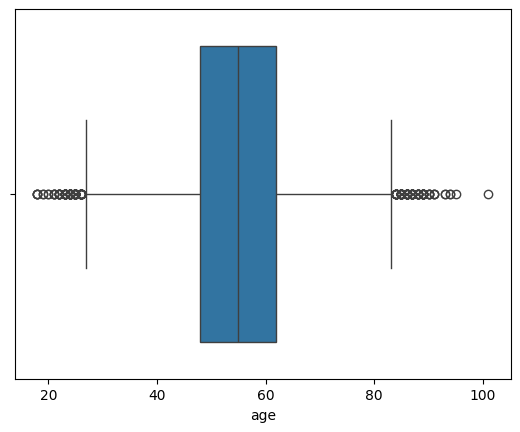

In [ ]:
sns.boxplot(x=df['age'])

<Axes: xlabel='other_cancer', ylabel='count'>

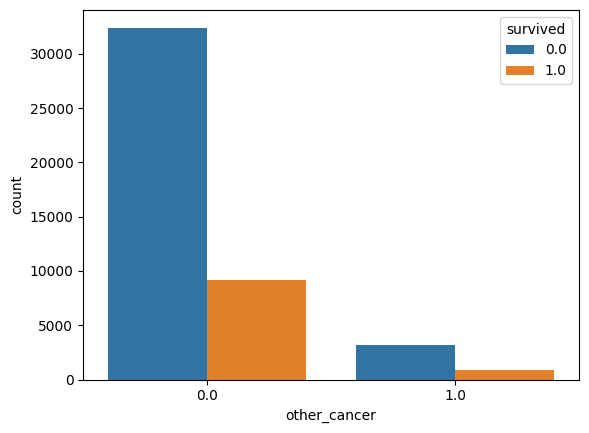

In [ ]:
sns.countplot(data=df, x='other_cancer', hue='survived')

<Axes: xlabel='hypertension', ylabel='count'>

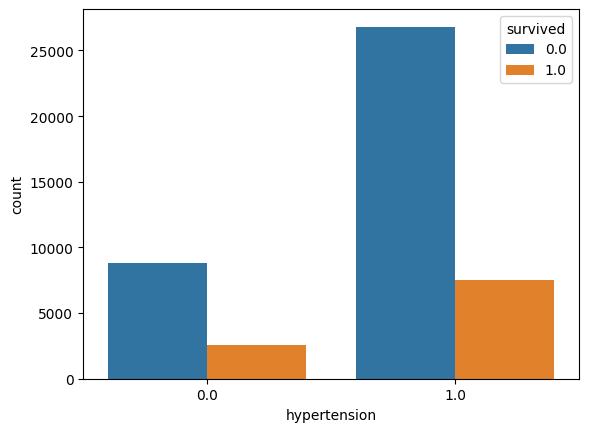

In [ ]:
sns.countplot(data=df, x='hypertension', hue='survived')

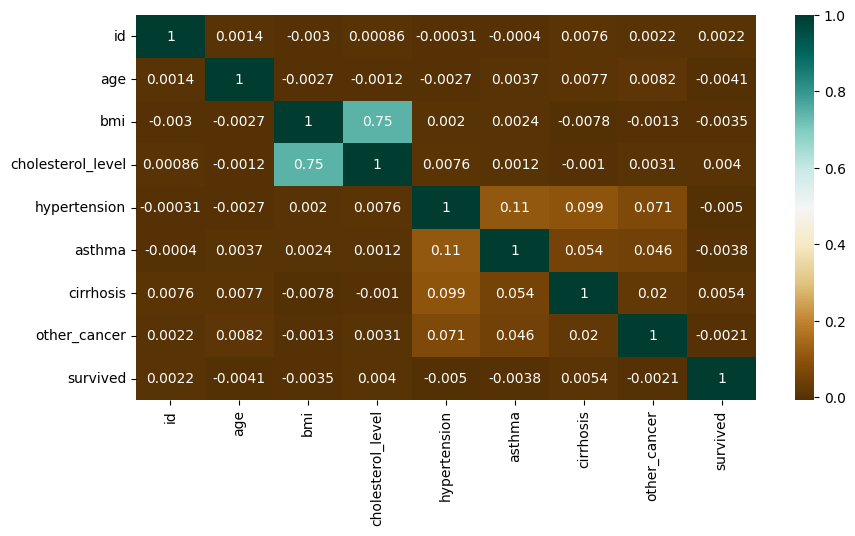

In [ ]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, cmap="BrBG", annot=True)
plt.show()

In [14]:
df=df.drop(["country","cancer_stage","family_history","smoking_status","treatment_type"],axis=1)

In [15]:
df.head()

,id,age,gender,diagnosis_date,beginning_of_treatment_date,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,end_treatment_date,survived,age_category
0,1,64.0,Female,2016-04-07,2016-04-21,31.1,257.0,1.0,1.0,0.0,0.0,2017-11-15,0.0,61-75
1,2,50.0,Male,2023-04-22,2023-05-02,25.9,208.0,1.0,0.0,0.0,0.0,2024-04-25,0.0,46-60
2,3,65.0,Male,2023-04-07,2023-04-12,18.9,193.0,0.0,0.0,0.0,0.0,2025-03-11,0.0,61-75
3,4,51.0,Female,2016-02-07,2016-02-13,34.6,249.0,1.0,1.0,1.0,0.0,2017-04-14,1.0,46-60
4,5,37.0,Male,2023-12-01,2023-12-03,40.2,262.0,0.0,0.0,0.0,0.0,2024-09-20,0.0,31-45


In [16]:
!pip  install scikit-learn
from sklearn.preprocessing import OneHotEncoder

In [31]:
encoder=OneHotEncoder()
encoded_data=encoder.fit_transform(df[["gender"]])

KeyError: "['gender'] not in index"

In [21]:
# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['gender']))
df = pd.concat([df, encoded_df], axis=1)

In [32]:
encoder=OneHotEncoder()
encoded_data=encoder.fit_transform(df[["diagnosis_date","beginning_of_treatment_date","end_treatment_date"]])

In [33]:
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(["diagnosis_date","beginning_of_treatment_date","end_treatment_date"]))
df = pd.concat([df, encoded_df], axis=1)

In [34]:
df =df.drop(["diagnosis_date","beginning_of_treatment_date","end_treatment_date"],axis=1)

In [ ]:
df =df.drop("gender",axis=1)

In [42]:
df =df.drop("age_category",axis=1)

In [35]:
df.head(2)

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,age_category,...,end_treatment_date_2026-03-10,end_treatment_date_2026-03-27,end_treatment_date_2026-03-30,end_treatment_date_2026-04-01,end_treatment_date_2026-04-06,end_treatment_date_2026-04-08,end_treatment_date_2026-04-09,end_treatment_date_2026-04-13,end_treatment_date_2026-04-25,end_treatment_date_2026-05-11
0,1,64.0,31.1,257.0,1.0,1.0,0.0,0.0,0.0,61-75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,50.0,25.9,208.0,1.0,0.0,0.0,0.0,0.0,46-60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
x=df.drop("survived",axis=1)

In [37]:
x.shape

(9200, 10255)

In [44]:
y=df["survived"]

In [39]:
y.shape

(9200,)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=101)

In [46]:

from sklearn.linear_model import LogisticRegression
lgc=LogisticRegression()
lgc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:

from sklearn import metrics
y_pred=lgc.predict(x_test)
print("accuracy of lgc is: ",metrics.accuracy_score(y_pred,y_test))


accuracy of lgc is:  0.7701086956521739


In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
from sklearn import metrics
y_pred=rfc.predict(x_test)
print("accuracy of rfc is: ",metrics.accuracy_score(y_pred,y_test))

accuracy of rfc is:  0.7603260869565217


In [50]:
!pip install scikit-learn
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(x_train,y_train)

GaussianNB()

In [51]:
from sklearn import metrics
y_pred=nbc.predict(x_test)
print("accuracy of nbc is: ",metrics.accuracy_score(y_pred,y_test))

accuracy of nbc is:  0.4032608695652174


In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
from sklearn import metrics
y_pred=dtc.predict(x_test)
print("acc of dtc is: ",metrics.accuracy_score(y_pred,y_test))

acc of dtc is:  0.7032608695652174


In [54]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
from sklearn import metrics
y_pred=knc.predict(x_test)
print("acc of knc is: ",metrics.accuracy_score(y_pred,y_test))


acc of knc is:  0.7369565217391304


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [57]:
from sklearn import metrics
y_pred=gbc.predict(x_test)
print("acc of gbc is: ",metrics.accuracy_score(y_pred,y_test))

acc of gbc is:  0.7701086956521739
